# Model Evaluation and Improvement

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_blobs(random_state=0)

In [5]:
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,random_state=0)

In [6]:
log=LogisticRegression().fit(Xtrain,ytrain)

In [11]:
print(f'test score: {log.score(Xtest,ytest)}')

test score: 0.88


In [12]:
import mglearn

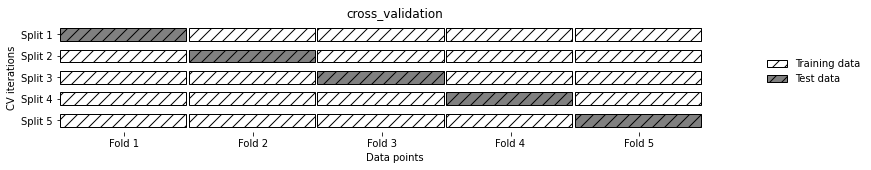

In [14]:
mglearn.plots.plot_cross_validation()

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [17]:
iris = load_iris()

In [27]:
svc= SVC()

In [30]:
scores = cross_val_score(svc, iris.data, iris.target)
print(f'cross validation score: {scores}')

cross validation score: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]


In [38]:
mean_score = scores.min()
print('mean score: {:.2f}'.format(mean_score))

mean score: 0.93


## Stratified k-Fold Cross-Validation and Other Strategies

In [64]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
cross_val_score(svc, iris.data, iris.target, cv=3)

array([0.96, 0.98, 0.94])

In [66]:
from sklearn.model_selection import KFold

In [67]:
kfold = KFold(n_splits=3)

In [69]:
cross_val_score(svc, iris.data, iris.target, cv=kfold)
#each fold corresponds to one of the classes in the iris dataset, and so nothing can be learned.

array([0., 0., 0.])

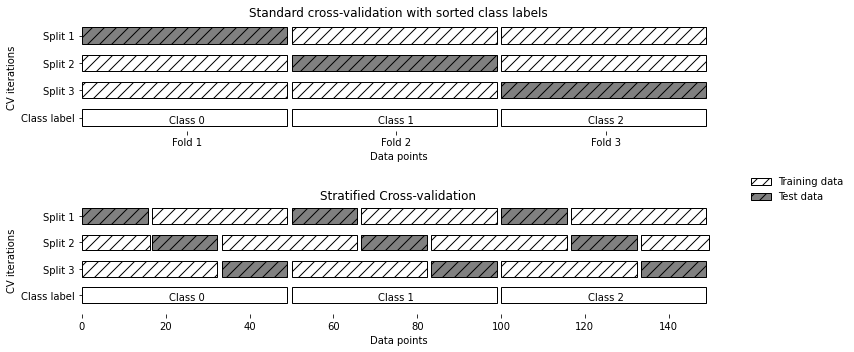

In [74]:
mglearn.plots.plot_stratified_cross_validation()

In [51]:
from sklearn.model_selection import StratifiedKFold

In [70]:
k = StratifiedKFold(n_splits=3)

In [79]:
scores = cross_val_score(svc, iris.data, iris.target, cv=k)
print(scores)

[0.96 0.98 0.94]


### shuffle the data instead of stratifying the folds

In [76]:
k2 = KFold(n_splits=3, shuffle=True, random_state=0)

In [80]:
scores = cross_val_score(svc, iris.data, iris.target, cv=k2)
print(scores)

[0.98 0.94 0.96]


### Leave-one-out cross-validation

In [81]:
from sklearn.model_selection import LeaveOneOut

In [82]:
loo = LeaveOneOut()

In [83]:
scores2 = cross_val_score(svc, iris.data, iris.target, cv=loo)

In [86]:
print(f'number of cv iteration: {len(scores2)}')
print('Mean accuracy: {:.2f}'.format(scores.mean()))

number of cv iteration: 150
Mean accuracy: 0.96


### Shuffle-split cross-validation

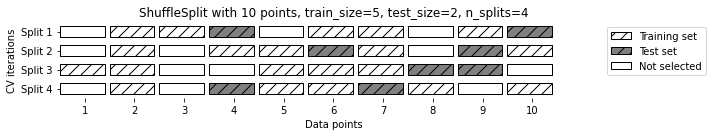

In [88]:
mglearn.plots.plot_shuffle_split()

In [89]:
from sklearn.model_selection import ShuffleSplit

In [103]:
shuffle2 = ShuffleSplit(train_size=0.5, test_size=0.5, n_splits=10)

In [110]:
scroes = cross_val_score(svc,iris.data,iris.target, cv=shuffle2)
print('mean score: {:.2f}'.format(scores.mean()))

mean score: 0.95


In [97]:
from sklearn.model_selection import StratifiedShuffleSplit

In [98]:
sfl = StratifiedShuffleSplit(train_size=0.5, test_size=0.5, n_splits=10)

In [111]:
scores = cross_val_score(svc, iris.data, iris.target, cv=sfl)
print('mean score: {:.2f}'.format(scores.mean()))

mean score: 0.95


### Cross-validation with groups

In [113]:
from sklearn.model_selection import GroupKFold

In [114]:
X,y = make_blobs(n_samples=12, random_state=0)

In [115]:
group = [0,0,0,1,1,1,1,2,2,3,3,3]

In [118]:
scores = cross_val_score(svc, X, y, group, cv=GroupKFold(n_splits=3))
print(scores)

[0.75       0.4        0.66666667]


/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# Grid Search

### Simple Grid Search

In [133]:
Xtrain,Xtest,ytrain,ytest = train_test_split(iris.data, iris.target, random_state=0)
print(f'train size: {Xtrain.shape[0]}')
print(f'test size: {Xtest.shape[0]}')
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(kernel='rbf', gamma=gamma, C=C)
        svc.fit(Xtrain, ytrain)
        score = svc.score(Xtest, ytest)
        if score > best_score:
            best_socre = score
            best_params = {'gamma':gamma, 'C':C}
            
print('best score: {:.2f}'.format(score))
print('best params: {}'.format(best_params))

train size: 112
test size: 38
best score: 0.45
best params: {'gamma': 100, 'C': 100}


In [134]:
from sklearn.model_selection import GridSearchCV

In [137]:
param = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [138]:
svc2 = SVC()

In [139]:
grid = GridSearchCV(svc2, param, cv=10)

In [144]:
grid.best_score_

0.9818181818181818

In [140]:
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [141]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [143]:
grid.best_estimator_.score(Xtest,ytest)

0.9736842105263158

In [146]:
grid.best_estimator_.predict(Xtest)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

### The Danger of Overfitting the Parameters and the Validation Set

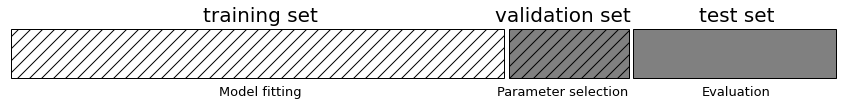

In [147]:
mglearn.plots.plot_threefold_split()

In [148]:
from sklearn.svm import SVC

In [149]:
Xtrainval, Xtest, ytrainval, ytest = train_test_split(iris.data, iris.target, random_state=0)

In [150]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtrainval, ytrainval, random_state=0)

In [154]:
print(f'training size: {Xtrain.shape[0]}')
print(f'validation size: {Xval.shape[0]}')
print(f'test size: {Xtest.shape[0]}')

training size: 84
validation size: 28
test size: 38


In [158]:
best_score = 0

In [161]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        svc.fit(Xtrain, ytrain)
        score = svc.score(Xval, yval)
        if score>best_score:
            best_score = score
            best_params={'gamma':gamma, 'C':C}
svm = SVC(**best_params)
svm.fit(Xtrainval, ytrainval)
test_score = svm.score(Xtest, ytest)
print(f'best score on validation set: {best_score}')
print(f'best parameters: {best_params}')
print(f'test score: {test_score}')

best score on validation set: 1.0
best parameters: {'gamma': 0.001, 'C': 100}
test score: 0.9736842105263158


### Grid Search with Cross-Validation

In [165]:
best_score=0
import numpy as np

In [169]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svc, Xtrainval, ytrainval, cv=5)
        score = np.mean(scores)
        if score>best_score:
            best_score=score
            best_param = {'gamma':gamma, 'C':C}
svc = SVC(**best_param)
print(f'best parameters:{best_param}')
svc.fit(Xtrainval, ytrainval)
best_score = svc.score(Xtest, ytest)
print(f'best score: {best_score}')

best parameters:{'gamma': 0.1, 'C': 10}
best score: 0.9736842105263158


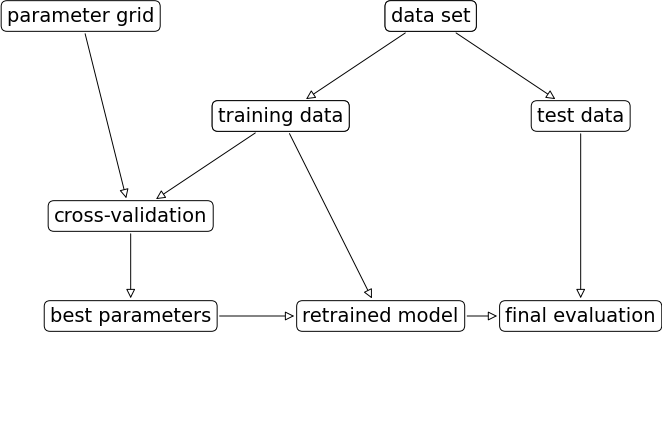

In [173]:
mglearn.plots.plot_grid_search_overview()

In [174]:
from sklearn.model_selection import GridSearchCV

In [252]:
params = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [253]:
grid = GridSearchCV(SVC(), params, cv=5)

In [177]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, random_state=0)
grid.fit(Xtrain, ytrain)
grid.score(Xtest,ytest)

0.9736842105263158

In [179]:
print(f'best parameters: {grid.best_params_}')
print(f'best score: {grid.best_score_}')
print(f'best estimator: {grid.best_estimator_}')

best parameters: {'C': 10, 'gamma': 0.1}
best score: 0.9731225296442687
best estimator: SVC(C=10, gamma=0.1)


In [221]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': [{'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
   'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [183]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [227]:
grid.best_estimator_.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [224]:
grid.best_estimator_.get_params()['C']

10

### Analyzing the result of cross-validation

In [229]:
import pandas as pd

In [235]:
results = pd.DataFrame(grid.cv_results_)

In [236]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002306,0.000929,0.000945,0.000315,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001783,0.000681,0.000696,0.000132,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001297,0.000225,0.000775,0.000159,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001530,0.000517,0.000679,0.000201,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000901,0.000081,0.000445,0.000052,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


In [248]:
scoreavg = np.array(results.mean_test_score).reshape(6,6)
scoreavg

array([[0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316,
        0.36640316],
       [0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316,
        0.36640316],
       [0.36640316, 0.69644269, 0.90158103, 0.95533597, 0.36640316,
        0.36640316],
       [0.69644269, 0.93794466, 0.96403162, 0.94664032, 0.9284585 ,
        0.50158103],
       [0.93794466, 0.96403162, 0.97312253, 0.94624506, 0.91106719,
        0.58142292],
       [0.96403162, 0.96442688, 0.95494071, 0.94624506, 0.91106719,
        0.58142292]])

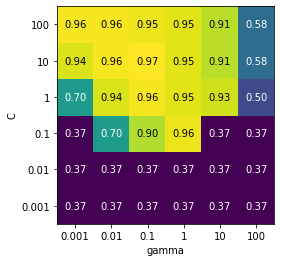

In [255]:
mglearn.tools.heatmap(scoreavg, xlabel='gamma', ylabel='C',xticklabels=params['gamma'], yticklabels=params['C'],  cmap='viridis');

In [258]:
from matplotlib import pyplot as plt

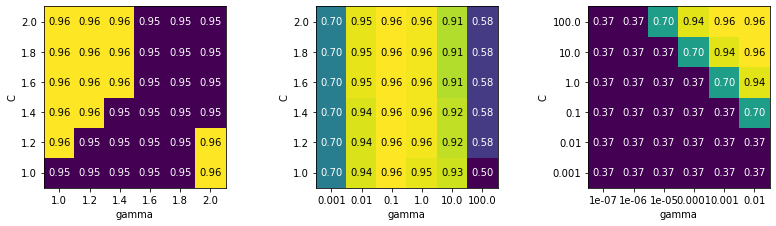

In [262]:
fig, axes = plt.subplots(1,3,figsize=(13, 5), gridspec_kw=dict(hspace=0.1, wspace=0.5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}
for params, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), params, cv=5)
    grid_search.fit(Xtrain, ytrain)
    means = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    mglearn.tools.heatmap(means, xlabel='gamma', ylabel='C', xticklabels=params['gamma'], yticklabels=params['C'], cmap='viridis', ax=ax)

### Search over spaces that are not grids

In [266]:
params1 = [{'kernel':['rbf'], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C':[0.001, 0.01, 0.1, 1, 10, 100]},{'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

In [267]:
grid3 = GridSearchCV(SVC(), params1, cv=5)
grid3.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [272]:
print(f'best score: {grid3.best_score_}')
print(f'best estimator: {grid3.best_estimator_}')
print(f'best estimator parameters: {grid3.best_estimator_.get_params()}')

best score: 0.9731225296442687
best estimator: SVC(C=10, gamma=0.1)
best estimator parameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [273]:
results = grid3.cv_results_

In [281]:
pd.DataFrame(results).T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.004255,0.001656,0.000983,0.000968,0.001276,0.000865,0.000819,0.000779,0.000766,0.000754,...,0.000426,0.000567,0.000895,0.000948,0.001184,0.000605,0.000563,0.000509,0.00048,0.000545
std_fit_time,0.004574,0.000573,0.000085,0.000104,0.000573,0.000047,0.000007,0.000026,0.000026,0.000006,...,0.000009,0.000023,0.000026,0.00012,0.000836,0.000027,0.000066,0.000061,0.000014,0.000102
mean_score_time,0.001127,0.000801,0.000575,0.000548,0.000495,0.000454,0.000416,0.000403,0.000407,0.000377,...,0.000257,0.000271,0.000359,0.000465,0.000291,0.00026,0.000263,0.000239,0.000224,0.000238
std_score_time,0.000875,0.000239,0.000184,0.000214,0.000046,0.00005,0.000003,0.000019,0.000051,0.000002,...,0.000038,0.000005,0.000008,0.000085,0.000065,0.000026,0.000049,0.00002,0.000005,0.000037
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


### Nested cross-validation

In [283]:
scores = cross_val_score(GridSearchCV(SVC(), params, cv=5), iris.data, iris.target, cv=5)
print(scores)

[0.96666667 1.         0.96666667 0.96666667 1.        ]


In [285]:
print('test mean score: {:.2f}'.format(scores.mean()))

test mean score: 0.98


# Evaluation Metrics and Scoring

In [286]:
from sklearn.datasets import load_digits

In [287]:
digits = load_digits()

In [288]:
y = digits.target==9

In [289]:
y.shape

(1797,)

In [297]:
np.unique(y)

array([False,  True])

In [290]:
digits.data.shape

(1797, 64)

In [292]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, y, random_state=0)

In [293]:
from sklearn.dummy import DummyClassifier

In [294]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(Xtrain,ytrain)

In [298]:
pred_most = dummy_majority.predict(Xtest)

In [301]:
print(f'unique predicted label: {np.unique(pred_most)}')
print('Test score: {:.2f}'.format(dummy_majority.score(Xtest, ytest)))

unique predicted label: [False]
Test score: 0.90


In [315]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(Xtrain, ytrain)
pred_tree = tree.predict(Xtest)
print('test score {:.2f}'.format(tree.score(Xtest,ytest)))

test score 0.92


In [327]:
from sklearn.linear_model import LogisticRegression
dummy_ = DummyClassifier().fit(Xtrain, ytrain)
pred_dummy = dummy_.predict(Xtest)
print('test score {:.2f}'.format(dummy.score(Xtest,ytest)))

test score 0.90


In [310]:
leg = LogisticRegression().fit(Xtrain, ytrain)
leg_pred = leg.predict(Xtest)
print('test score {:.2f}'.format(leg.score(Xtest, ytest)))

test score 0.98


/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion matrices

In [311]:
from sklearn.metrics import confusion_matrix

In [313]:
confusion = confusion_matrix(ytest, leg_pred)
confusion

array([[399,   4],
       [  7,  40]])

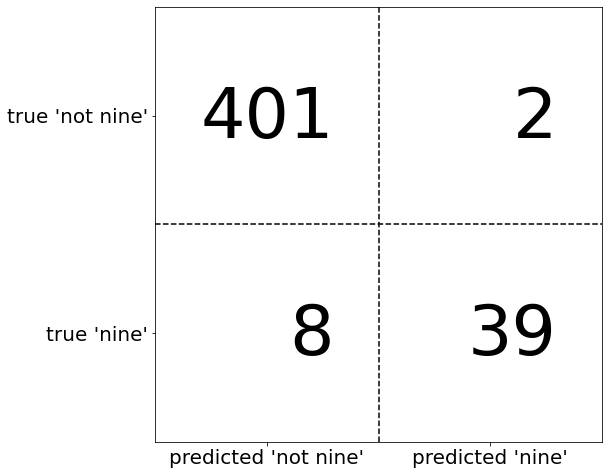

In [314]:
mglearn.plots.plot_confusion_matrix_illustration()

In [317]:
print(f'most frequent:\n {confusion_matrix(ytest, pred_most)}')

most frequent:
 [[403   0]
 [ 47   0]]


In [318]:
print(f'dummy model: \n {confusion_matrix(ytest, pred_dummy)}')

dummy model: 
 [[403   0]
 [ 47   0]]


In [319]:
print(f'tree model: \n {confusion_matrix(ytest, pred_tree)}')

tree model: 
 [[390  13]
 [ 24  23]]


In [321]:
print(f'Logistic Regression: \n {confusion_matrix(ytest ,leg_pred)}')

Logistic Regression: 
 [[399   4]
 [  7  40]]


In [329]:
from sklearn.metrics import f1_score

In [337]:
print(f'most frequent: {f1_score(ytest, pred_most)}')
print(f'dummy model: {f1_score(ytest, pred_dummy)}')
print('tree model: {:.2f}'.format(f1_score(ytest, pred_tree)))
print('Logistic Regression: {:.2f}'.format(f1_score(ytest, leg_pred)))

most frequent: 0.0
dummy model: 0.0
tree model: 0.55
Logistic Regression: 0.88


In [339]:
from sklearn.metrics import classification_report

In [350]:
print(classification_report(ytest, pred_most, target_names=["not_nine", "nine"]))
print(classification_report(ytest, pred_dummy, target_names=["not_nine", "nine"]))
print(classification_report(ytest, pred_tree, target_names=["not_nine", "nine"]))
print(classification_report(ytest, leg_pred, target_names=["not_nine", "nine"]))

              precision    recall  f1-score   support

    not_nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

              precision    recall  f1-score   support

    not_nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

              precision    recall  f1-score   support

    not_nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450

              preci

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/david/opt/an

## Taking uncertainty into account

In [351]:
from sklearn.datasets import make_blobs

In [371]:
X, y = make_blobs(n_samples=400, centers=2, cluster_std=[7.0, 2],random_state=22)

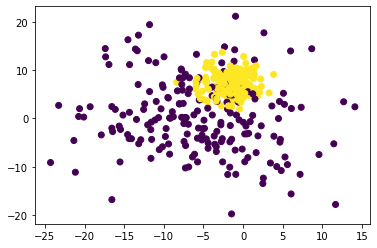

In [374]:
plt.scatter(X[:,0], X[:,1], c=y)

In [375]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=0)

In [378]:
svc = SVC(gamma=.05).fit(Xtrain, ytrain)

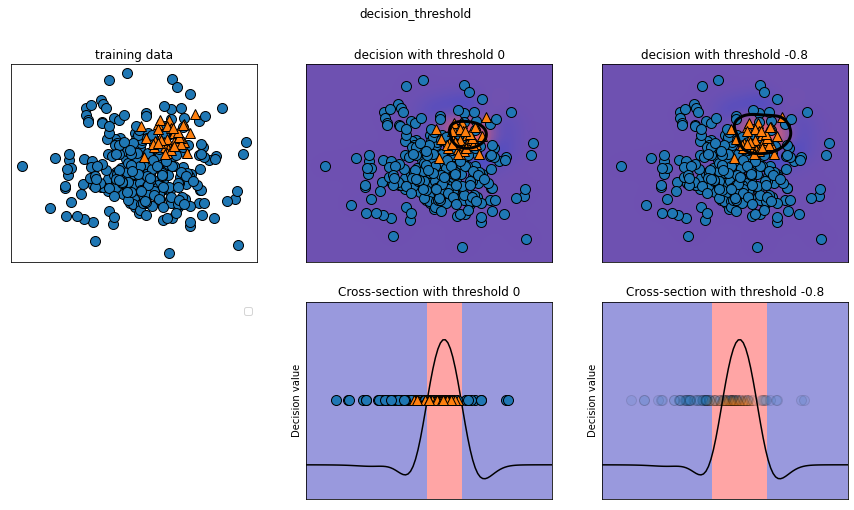

In [377]:
mglearn.plots.plot_decision_threshold()

In [379]:
print(classification_report(ytest, svc.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        56
           1       0.86      0.98      0.91        44

    accuracy                           0.92       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



In [382]:
y_pred_lower_threshold = svc.decision_function(Xtest)> -0.8 
#points with a decision_function value greater than 0 will be classified as class 1

In [381]:
print(classification_report(ytest, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        56
           1       0.81      1.00      0.90        44

    accuracy                           0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100



### Precision-recall curves and ROC curves

In [383]:
from sklearn.metrics import precision_recall_curve

In [384]:
precision, recall, threshold = precision_recall_curve(ytest, svc.decision_function(Xtest))

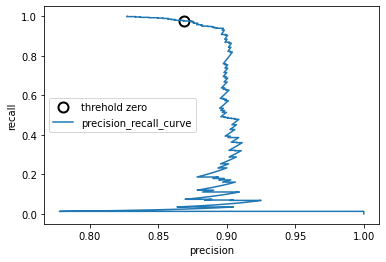

In [426]:
X,y = make_blobs(n_samples=4500, centers=2, cluster_std=[7.0, 2], random_state=22)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(Xtrain, ytrain)
precision, recall, thresholds = precision_recall_curve(ytest, svc.decision_function(Xtest))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'ok', fillstyle='none', markersize=10, mew=2, label='threhold zero')
plt.plot(precision, recall, label='precision_recall_curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best');

In [429]:
from sklearn.ensemble import RandomForestClassifier

In [436]:
rf = RandomForestClassifier(n_estimators=100, max_features=2, random_state=0).fit(Xtrain, ytrain)

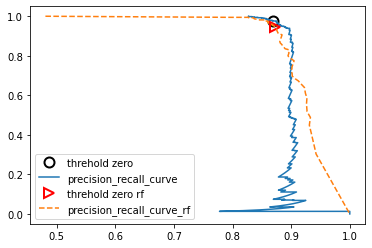

In [457]:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'ok', fillstyle='none', markersize=10, mew=2, label='threhold zero')
plt.plot(precision, recall,'-', label='precision_recall_curve')

precision_rf, recall_rf, threshold_rf = precision_recall_curve(ytest, rf.predict_proba(Xtest)[:,1])
close_zero_rf = np.argmin(np.abs(threshold_rf-0.5))
plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], '>r', fillstyle='none', markersize=10, mew=2, label='threhold zero rf')
plt.plot(precision_rf, recall_rf, '--',label='precision_recall_curve_rf')
plt.legend(loc='best');

In [461]:
print('f1 score of Random forest: {:.2f}'.format(f1_score(ytest, rf.predict(Xtest))))
print('f1 score of support vector machine: {:.2f}'.format(f1_score(ytest, svc.predict(Xtest))))

f1 score of Random forest: 0.91
f1 score of support vector machine: 0.92


In [462]:
from sklearn.metrics import average_precision_score

In [463]:
ap_rf = average_precision_score(ytest, rf.predict_proba(Xtest)[:,1])
ap_svm = average_precision_score(ytest, svc.decision_function(Xtest))

In [464]:
print('avg precision score for rf: {:.2f}'.format(ap_rf))
print('avg precision score for svc: {:.2f}'.format(ap_svm))

avg precision score for rf: 0.92
avg precision score for svc: 0.90


### Receiver operating characteristics (ROC) and AUC

In [466]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [467]:
fpr, tpr, threshold = roc_curve(ytest, svc.decision_function(Xtest))

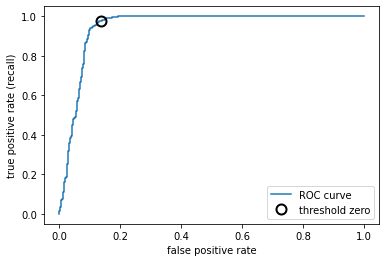

In [476]:
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (recall)')
close_zero =np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'ok', fillstyle='none', mew=2, markersize=10, label='threshold zero')
plt.legend();

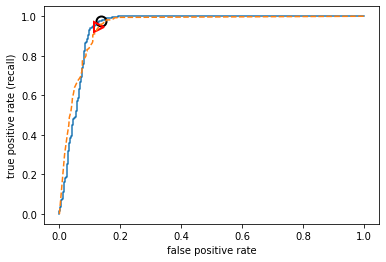

In [481]:
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (recall)')
close_zero =np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'ok', fillstyle='none', mew=2, markersize=10, label='threshold zero')

fpr_rf, tpr_rf, threshold_rf = roc_curve(ytest, rf.predict_proba(Xtest)[:,1])
close_to = np.argmin(np.abs(threshold_rf-0.5))
plt.plot(fpr_rf[close_to], tpr_rf[close_to], '>r', fillstyle='none', mew=2, markersize=10, label='threshold zero')
plt.plot(fpr_rf, tpr_rf, '--')

In [485]:
roc_score_rf = roc_auc_score(ytest, rf.predict_proba(Xtest)[:,1])
roc_score_svc = roc_auc_score(ytest, svc.decision_function(Xtest))
print('rf_roc score: {:.3f}'.format(roc_score_rf))
print('svc_roc score: {:.3f}'.format(roc_score_svc))

rf_roc score: 0.949
svc_roc score: 0.946


In [486]:
y = digits.target==9

In [491]:
Xtraini, Xtesti, ytraini, ytesti = train_test_split(digits.data, y, random_state=0)

gamma = 1.00 accuracy = 0.90 auc = 0.50
gamma = 0.05 accuracy = 0.90 auc = 1.00
gamma = 0.01 accuracy = 0.90 auc = 1.00


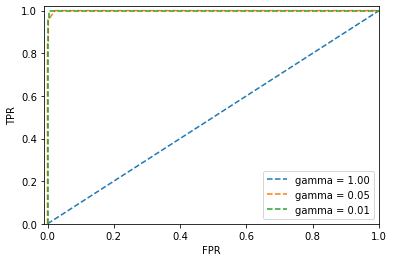

In [497]:
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svci = SVC(gamma=gamma).fit(Xtraini, ytraini)
    accuracy = svci.score(Xtesti, ytesti)
    fpr, tpr, _ = roc_curve(ytesti, svci.decision_function(Xtesti))
    roc_score = roc_auc_score(ytesti, svci.decision_function(Xtesti))
    print('gamma = {:.2f} accuracy = {:.2f} auc = {:.2f}'.format(gamma, accuracy, roc_score))
    plt.plot(fpr, tpr, '--', label='gamma = {:.2f}'.format(gamma))
plt.xlabel("FPR") 
plt.ylabel("TPR") 
plt.xlim(-0.01, 1) 
plt.ylim(0, 1.02)
plt.legend(loc="best")

# Metrics for Multiclass Classification

In [501]:
from sklearn.metrics import accuracy_score

In [503]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(Xtrain, ytrain)
pred = lr.predict(Xtest)
accuracy =accuracy_score(ytest, pred)
print('accuracy socre: {:.3f}'.format(accuracy))
confusion_matrix(ytest, pred)

accuracy socre: 0.951


/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

In [504]:
import seaborn as sns

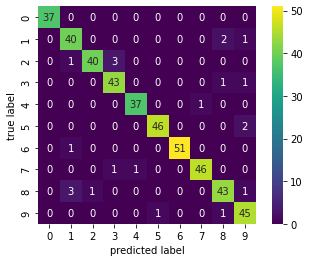

In [514]:
sns.heatmap(confusion_matrix(ytest, pred), annot=True, square=True, cmap='viridis', fmt='d',xticklabels=digits.target_names, yticklabels=digits.target_names )
plt.xlabel('predicted label')
plt.ylabel('true label');

In [515]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [520]:
print('micro f1 score: {:.3f}'.format(f1_score(ytest, pred, average='micro')))
print('macro f1 score: {:.3f}'.format(f1_score(ytest, pred, average='macro')))
print('weighted f1 score: {:.3f}'.format(f1_score(ytest, pred, average='weighted')))

micro f1 score: 0.951
macro f1 score: 0.952
weighted f1 score: 0.951


# Using Evaluation Metrics in Model Selection

In [526]:
print('default score: {}'.format(cross_val_score(SVC(), digits.data, digits.target==9)))
print('default score: {}'.format(cross_val_score(SVC(), digits.data, digits.target==9, scoring = 'accuracy')))
print('default score: {}'.format(cross_val_score(SVC(), digits.data, digits.target==9, scoring = 'roc_auc')))

default score: [0.975      0.99166667 1.         0.99442897 0.98050139]
default score: [0.975      0.99166667 1.         0.99442897 0.98050139]
default score: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [533]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target==9, random_state=0)
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(Xtrain, ytrain)
print('Grid-Search with accuracy')
print('best parameters: {}'.format(grid.best_params_))
print('best score: {:.3f}'.format(grid.best_score_))
print('roc_auc score: {:.3f}'.format(roc_auc_score(ytest, grid.decision_function(Xtest))))
print('accuracy score: {:.3f}'.format(grid.score(Xtest,ytest)))

Grid-Search with accuracy
best parameters: {'gamma': 0.0001}
best score: 0.976
roc_auc score: 0.992
accuracy score: 0.973


In [535]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target==9, random_state=0)
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc')
grid.fit(Xtrain, ytrain)
print('Grid-Search with accuracy')
print('best parameters: {}'.format(grid.best_params_))
print('best score: {:.3f}'.format(grid.best_score_))
print('roc_auc score: {:.3f}'.format(roc_auc_score(ytest, grid.decision_function(Xtest))))
print('accuracy score: {:.3f}'.format(grid.score(Xtest,ytest)))

Grid-Search with accuracy
best parameters: {'gamma': 0.01}
best score: 0.998
roc_auc score: 1.000
accuracy score: 1.000


In [536]:
from sklearn.metrics import SCORERS

In [540]:
print(f'available scorers:\n {sorted(SCORERS.keys())}')

available scorers:
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', '